In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\dataset\heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Preprocessing and EDA -->

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# checking null values -->
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# to check duplicated values --> 

df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
df1 = df.drop_duplicates()

In [9]:
df1.shape

(302, 14)

Hence there are too many duplicate values we can't drop them because our dataset become very small. So, we will work with df-->


In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

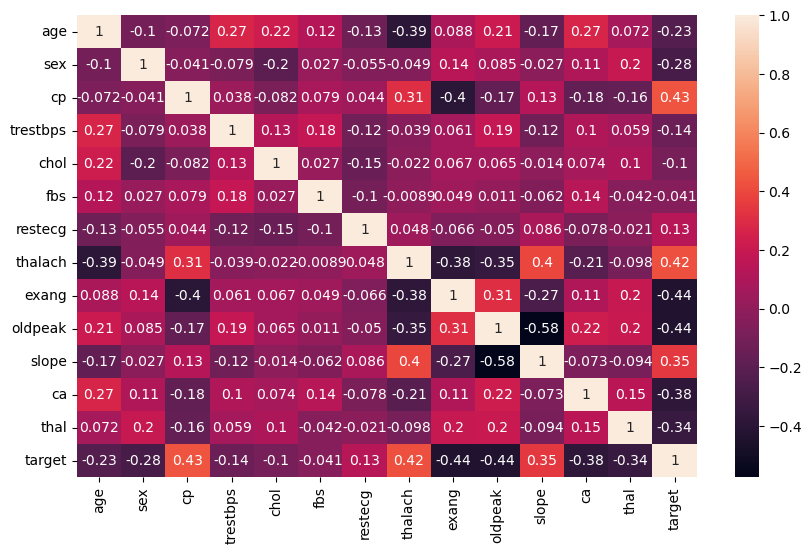

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='age', ylabel='Density'>

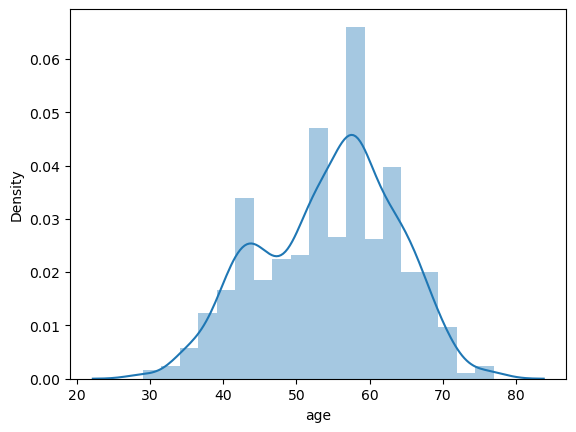

In [12]:
# to see the distribution of data-->

sns.distplot(df["age"])

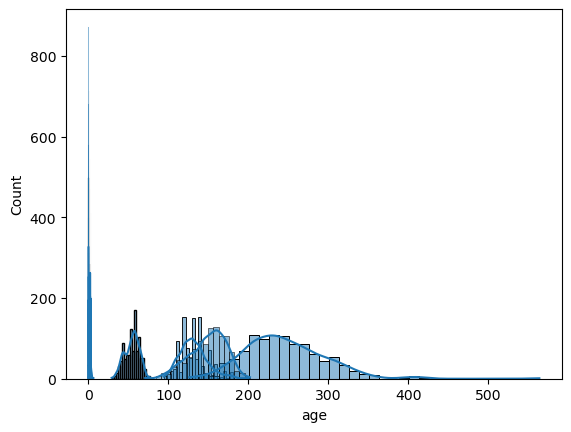

In [13]:
# for seeing distribution of all the columns -->

for i in df.columns:
    sns.histplot(df[i],kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x26eb5f9c850>,
 'caps': [<matplotlib.lines.Line2D at 0x26eb5f9cdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26eb5f9c580>,
 'medians': [<matplotlib.lines.Line2D at 0x26eb5fac340>,
 'fliers': [<matplotlib.lines.Line2D at 0x26eb5fac610>,
 'means': []}

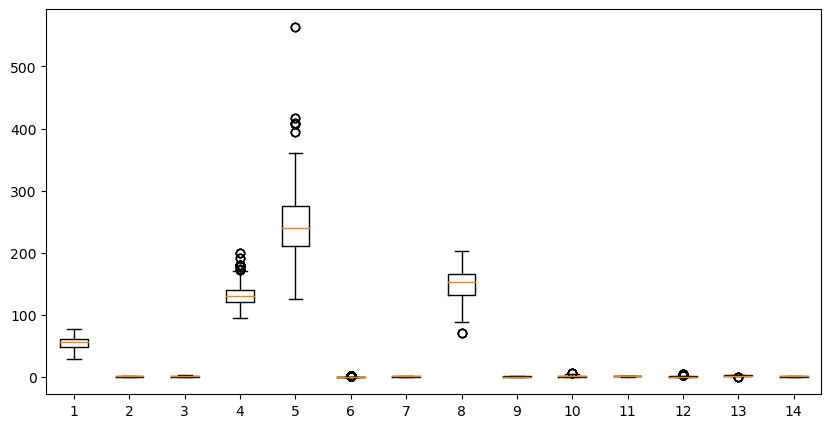

In [14]:
plt.figure(figsize=(10,5)) 
plt.boxplot(df) # we can see outliers with help of box plot.

In [15]:
# spliiting the dependent and independent variable -->
x = df.iloc[:,:-1] # independent variable
y = df.iloc[:,-1] # dependent variable

In [16]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [18]:
# splitting the data into training and testing -->
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [19]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
657,39,0,2,138,220,0,1,152,0,0.0,1,0,2
399,63,1,3,145,233,1,0,150,0,2.3,0,0,1
288,58,0,2,120,340,0,1,172,0,0.0,2,0,2
429,47,1,2,108,243,0,1,152,0,0.0,2,0,2
692,53,1,0,140,203,1,0,155,1,3.1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,52,1,0,125,212,0,1,168,0,1.0,2,2,3
858,68,0,2,120,211,0,0,115,0,1.5,1,0,2
636,59,0,0,174,249,0,1,143,1,0.0,1,0,2
245,44,1,1,130,219,0,0,188,0,0.0,2,0,2


In [20]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
44,55,0,1,132,342,0,1,166,0,1.2,2,0,2
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2
303,60,1,0,145,282,0,0,142,1,2.8,1,2,3
272,39,0,2,138,220,0,1,152,0,0.0,1,0,2
501,35,0,0,138,183,0,1,182,0,1.4,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,68,1,2,118,277,0,1,151,0,1.0,2,1,3
232,60,1,0,125,258,0,0,141,1,2.8,1,1,3
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2
585,40,1,3,140,199,0,1,178,1,1.4,2,0,3


In [21]:
# now let's make a pipeline for handling missing values and standardising the data -->
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # for handling missing values
from sklearn.preprocessing import StandardScaler # for standardisation

In [22]:
preprocessor = Pipeline(
        steps= [
            ('imputer',SimpleImputer(strategy='median')),
            ('scaler',StandardScaler())
        ]

)

In [23]:
#Scaling the data -->
x_train = preprocessor.fit_transform(x_train)

In [24]:
x_train

array([[-1.69054687, -1.49018699,  1.03576525, ..., -0.64423636,
        -0.74025574, -0.52951145],
       [ 0.97138539,  0.67105672,  1.99854974, ..., -2.27503395,
        -0.74025574, -2.14393301],
       [ 0.41681617, -1.49018699,  1.03576525, ...,  0.98656122,
        -0.74025574, -0.52951145],
       ...,
       [ 0.52773001, -1.49018699, -0.88980375, ..., -0.64423636,
        -0.74025574, -0.52951145],
       [-1.13597765,  0.67105672,  0.07298075, ...,  0.98656122,
        -0.74025574, -0.52951145],
       [-0.02683921,  0.67105672,  0.07298075, ...,  0.98656122,
         0.22701176,  1.08491012]])

In [25]:
x_test = preprocessor.transform(x_test)

In [26]:
x_test

array([[ 0.08407463, -1.49018699,  0.07298075, ...,  0.98656122,
        -0.74025574, -0.52951145],
       [-1.02506381, -1.49018699,  0.07298075, ..., -0.64423636,
        -0.74025574, -0.52951145],
       [ 0.63864385,  0.67105672, -0.88980375, ..., -0.64423636,
         1.19427927,  1.08491012],
       ...,
       [-2.24511609,  0.67105672,  1.99854974, ...,  0.98656122,
        -0.74025574, -0.52951145],
       [-1.57963303,  0.67105672,  1.99854974, ...,  0.98656122,
        -0.74025574,  1.08491012],
       [-0.13775305,  0.67105672, -0.88980375, ..., -2.27503395,
        -0.74025574,  1.08491012]])

# Model Implementation -->

In [27]:
# now let's import the models and evaluate them -->
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# KNN ->

In [28]:
# Let's start with the KNN ->
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [29]:
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

# Decision Tree ->

In [30]:
# now let's see decison tree -->
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [31]:
y_pred1 = decision_tree.predict(x_test)
y_pred1

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,

[Text(0.5, 0.8333333333333334, 'X[2] <= -0.408\ngini = 0.5\nsamples = 686\nvalue = [343, 343]'),
 Text(0.25, 0.5, 'X[11] <= -0.257\ngini = 0.366\nsamples = 344\nvalue = [261, 83]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.499\nsamples = 147\nvalue = [76, 71]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.114\nsamples = 197\nvalue = [185, 12]'),
 Text(0.75, 0.5, 'X[0] <= 0.14\ngini = 0.365\nsamples = 342\nvalue = [82, 260]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.177\nsamples = 204\nvalue = [20, 184]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.495\nsamples = 138\nvalue = [62, 76]')]

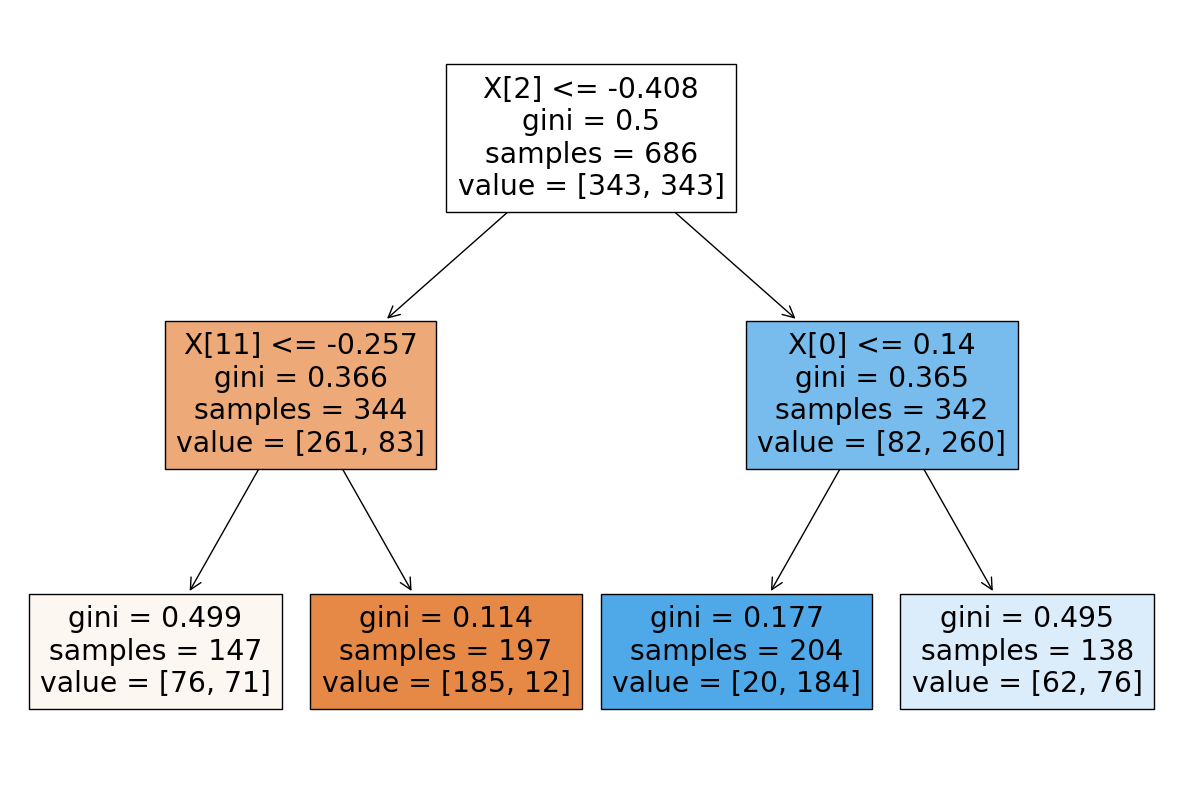

In [32]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled = True)

# Naive Bayes -->

In [33]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [34]:
y_pred2 =naive_bayes.predict(x_test)
y_pred2

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,

# Model Evaluation -->

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
models={
    'KNN' : KNeighborsClassifier(n_neighbors=5,algorithm='auto'),
    'Decision tree' : DecisionTreeClassifier(max_depth=2),
    'Naive Bayes' : GaussianNB()
}

In [37]:
def evaluate_model(x_train,y_train,x_test,y_test,models):
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        #train model
        model.fit(x_train,y_train)
        
        # predict 
        y_test_pred = model.predict(x_test)
        # get accuracy score
        test_model_score = accuracy_score(y_test,y_test_pred)
        report[list(models.keys())[i]] = test_model_score
        
        
    return report

In [38]:
# comparing accuracies of different models -->
evaluate_model(x_train,y_train,x_test,y_test,models)

{'KNN': 0.8407079646017699,
 'Decision tree': 0.7610619469026548,
 'Naive Bayes': 0.8082595870206489}

In [39]:
# implementing other evaluation techniques  -->
from sklearn.metrics import confusion_matrix,classification_report

# KNN ->

In [40]:
# KNN -->
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[124  22]
 [ 32 161]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       146
           1       0.88      0.83      0.86       193

    accuracy                           0.84       339
   macro avg       0.84      0.84      0.84       339
weighted avg       0.84      0.84      0.84       339



# Decision Trees ->

In [41]:

print(confusion_matrix(y_pred1,y_test))
print(classification_report(y_pred1,y_test))

[[114  39]
 [ 42 144]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       153
           1       0.79      0.77      0.78       186

    accuracy                           0.76       339
   macro avg       0.76      0.76      0.76       339
weighted avg       0.76      0.76      0.76       339



# Naive bayes->

In [42]:
# naive bayes-->
print(confusion_matrix(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

[[128  37]
 [ 28 146]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       165
           1       0.80      0.84      0.82       174

    accuracy                           0.81       339
   macro avg       0.81      0.81      0.81       339
weighted avg       0.81      0.81      0.81       339



# overfitting check -->

# KNN ->

In [43]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
y_train_pred = knn.predict(x_train)
print(accuracy_score(y_train_pred,y_train))
y_test_pred = knn.predict(x_test)
print(accuracy_score(y_test_pred,y_test))

0.934402332361516
0.8407079646017699


We can clearly see that our model is overfit as it is performing pretty good in training data but in testing data it's accuracy get's low.

# Decision Tree ->

In [45]:
decision_tree.fit(x_train,y_train)
y_train_pred_decision = decision_tree.predict(x_train)
print(accuracy_score(y_train_pred_decision,y_train))
y_test_pred_decision = decision_tree.predict(x_test)
print(accuracy_score(y_test_pred_decision,y_test))

0.7594752186588921
0.7610619469026548


# Naive Bayes ->

In [46]:
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [47]:
y_train_pred_nb = naive_bayes.predict(x_train)
print(accuracy_score(y_train_pred_nb,y_train))
y_test_pred_nb = naive_bayes.predict(x_test)
print(accuracy_score(y_test_pred_nb,y_test))

0.8381924198250729
0.8082595870206489


we can see that our KNN model is overfitted and accuracy of decision tree model is pretty low and naive bayes model's accuracy is also low.
So, let's try to perform hyperparameter tuning to overcome the overfitting and increase their accuracies.

# Hyperparameter Tuning / Cross Validation -->


# KNN ->

In [48]:

k_range = list(range(1, 31))
parameters = dict(n_neighbors=k_range)


In [49]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

In [50]:
grid = GridSearchCV(knn, param_grid= parameters, cv=10, scoring='accuracy')

In [51]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [52]:
grid.best_params_

{'n_neighbors': 1}

In [53]:
y_predict_cv = grid.predict(x_test)
y_predict_cv 

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

# Decision Trees ->

In [54]:

parameters1 = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [55]:
tree_classifier = DecisionTreeClassifier()

In [56]:
decision_cv = GridSearchCV(tree_classifier,param_grid=parameters1,cv=10,scoring='accuracy')

In [57]:
decision_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [58]:
y_predict_DecisionCV = decision_cv.predict(x_test)
y_predict_DecisionCV

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

# Naive Bayes ->

In [59]:

parameters2 = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [60]:
naive_bayes_cv = GaussianNB()

In [61]:
naive_bayesCV = GridSearchCV(naive_bayes_cv,param_grid=parameters2,cv=10,scoring='accuracy')

In [62]:
naive_bayesCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [63]:
y_predict_naiveCV = naive_bayesCV.predict(x_test)

In [64]:
y_predict_naiveCV

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,

# checking accuracy after cross validation -->

# KNN ->

In [65]:

print(accuracy_score(y_predict_cv,y_test))
print(confusion_matrix(y_predict_cv,y_test))
print(classification_report(y_predict_cv,y_test))

0.9734513274336283
[[150   3]
 [  6 180]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       153
           1       0.98      0.97      0.98       186

    accuracy                           0.97       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.97      0.97      0.97       339



# Decision Tree ->

In [66]:
print(accuracy_score(y_predict_DecisionCV,y_test))
print(classification_report(y_predict_DecisionCV,y_test))
print(confusion_matrix(y_predict_DecisionCV,y_test))

0.8407079646017699
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       166
           1       0.83      0.87      0.85       173

    accuracy                           0.84       339
   macro avg       0.84      0.84      0.84       339
weighted avg       0.84      0.84      0.84       339

[[134  32]
 [ 22 151]]


#  Naive Bayes ->

In [67]:
print(accuracy_score(y_predict_naiveCV,y_test))
print(confusion_matrix(y_predict_naiveCV,y_test))
print(classification_report(y_predict_naiveCV,y_test))

0.8112094395280236
[[127  35]
 [ 29 148]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       162
           1       0.81      0.84      0.82       177

    accuracy                           0.81       339
   macro avg       0.81      0.81      0.81       339
weighted avg       0.81      0.81      0.81       339



We can see that the accuracies of model are increased.